## Ejercicio de autoML con Pycaret

Steps invloved in PyCaret Model Building and Development
1. Installing and Importing PyCaret Library
2. Dataset Loading
3. Problem Statement understanding, Classfication or Regression
4. Loading data into PyCaret framework using setup
5. Find best models by training it with different algorithms.
6. Choose the best algorithm/s and hyper-tune the parameters for better performance.
7. Visualize the Results
8. Predictive Analytics using PyCaret
9. Deployment ready model development
* **Note:** It hardly takes 6 lines of code to build a deployable predictive model

In [1]:
#!pip install pycaret

In [17]:
import numpy as np
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#!wget -P ./../data/ https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/data/titanic_train.csv

In [23]:
data = pd.read_csv("../data/titanic_train.csv", index_col='PassengerId') 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
import pycaret
from pycaret.classification import *

# Preprocesamiento de los datos con Pycaret

In [25]:
clf1 = setup(data = data, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1415
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Entrenamiento de modelos

In [26]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.802700,0.000000,0.702700,0.770500,0.732900,0.577000
1,Extreme Gradient Boosting,0.802700,0.851400,0.648200,0.804400,0.713900,0.566500
2,Logistic Regression,0.801000,0.843300,0.698200,0.773800,0.730100,0.573300
3,Linear Discriminant Analysis,0.799500,0.840500,0.702700,0.763500,0.729700,0.570900
4,Gradient Boosting Classifier,0.799400,0.854100,0.665000,0.788600,0.717600,0.564200
5,CatBoost Classifier,0.796100,0.848800,0.665000,0.778600,0.714400,0.557600
6,Light Gradient Boosting Machine,0.792900,0.855100,0.706900,0.749100,0.723900,0.558700
7,Ada Boost Classifier,0.786600,0.833200,0.710900,0.736100,0.719700,0.547800
8,Random Forest Classifier,0.768800,0.816200,0.648400,0.723400,0.681300,0.501200
9,Extra Trees Classifier,0.764100,0.810200,0.673700,0.705900,0.686000,0.497900


# Selección del mejor modelo

In [27]:
lgbm  = create_model('lightgbm')     

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8254,0.8878,0.7500,0.7826,0.7660,0.6268
1,0.8254,0.9049,0.7083,0.8095,0.7556,0.6207
2,0.7778,0.8462,0.7500,0.6923,0.7200,0.5363
3,0.7419,0.8166,0.6522,0.6522,0.6522,0.4470
4,0.8226,0.8651,0.7500,0.7826,0.7660,0.6232
5,0.8065,0.9320,0.5833,0.8750,0.7000,0.5654
6,0.7419,0.8246,0.7500,0.6429,0.6923,0.4723
7,0.7742,0.8015,0.6667,0.7273,0.6957,0.5167
8,0.8387,0.8651,0.7500,0.8182,0.7826,0.6548
9,0.7742,0.8070,0.7083,0.7083,0.7083,0.5241


# Optimización de hiperparametros

In [28]:
tuned_lgbm = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8571,0.8803,0.7917,0.8261,0.8085,0.6947
1,0.8254,0.9071,0.6250,0.8824,0.7317,0.6078
2,0.7778,0.8531,0.7083,0.7083,0.7083,0.5288
3,0.7419,0.8222,0.6522,0.6522,0.6522,0.4470
4,0.8548,0.8723,0.7500,0.8571,0.8000,0.6869
5,0.8548,0.8947,0.7083,0.8947,0.7907,0.6819
6,0.8226,0.8618,0.7917,0.7600,0.7755,0.6289
7,0.7742,0.8564,0.5833,0.7778,0.6667,0.5011
8,0.8226,0.8761,0.7083,0.8095,0.7556,0.6173
9,0.8226,0.7966,0.7083,0.8095,0.7556,0.6173


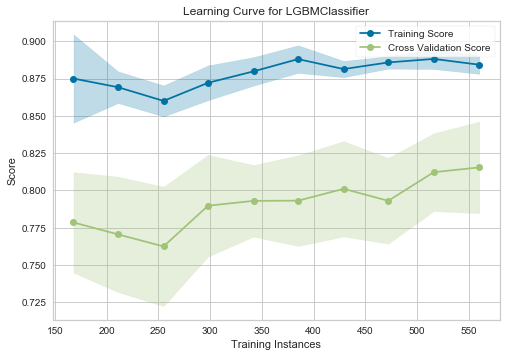

In [29]:
plot_model(estimator = tuned_lgbm, plot = 'learning')

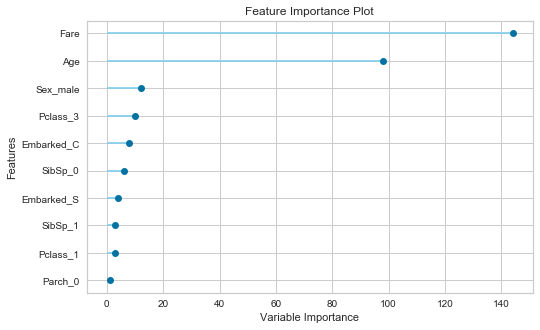

In [30]:
plot_model(estimator = tuned_lgbm, plot = 'feature')

Confusion matrix at its ease!

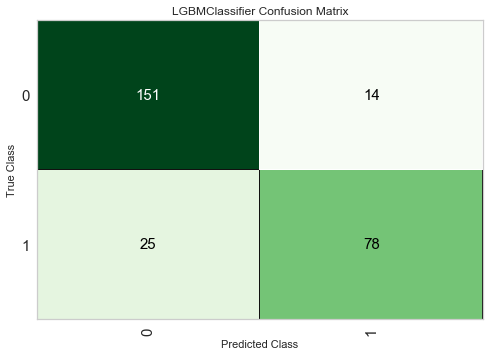

In [31]:
plot_model(estimator = tuned_lgbm, plot = 'confusion_matrix')

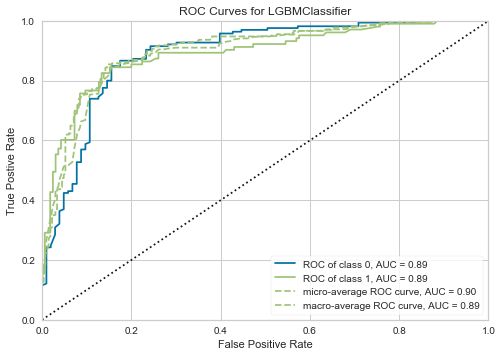

In [32]:
# AUC Curve for Classifications models
plot_model(estimator = tuned_lgbm, plot = 'auc')

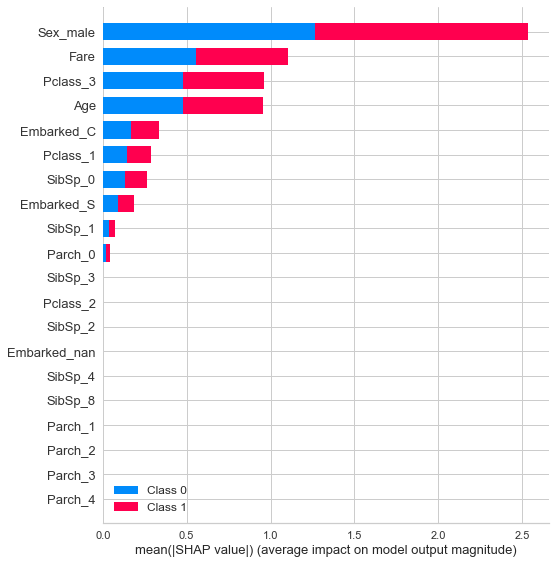

In [33]:
# Understand which feature had most role to play in the classification task
interpret_model(tuned_lgbm)

Save the model you trained to a deployable pickle file (.pkl) using a simple line of code written below. 

In [34]:
save_model(tuned_lgbm, 'Titaniclgbm')
# code to load the model for future uses or when making predictions
# trained_model = load_model('Titaniclgbm')

Transformation Pipeline and Model Succesfully Saved


# Predicción con datos de test

In [36]:
# Load the test data
test = pd.read_csv('test.csv') 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0415
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.2692
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0663
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0563
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.3686
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.0796
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9749
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0088
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.0796


In [37]:
predictions = predict_model(tuned_lgbm, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0415
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.2692
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0663
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0563
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.3686


In [40]:
sub   = pd.read_csv('gender_submission.csv')

# Obtención de resultados en DataFrame y guardar el modelo

In [41]:
sub['Survived'] = round(predictions['Score']).astype(int)
sub.to_csv('submission.csv',index=False)

In [ ]:
# Blend your model ton other algorithm.
xgb   = create_model('xgboost');    
logr  = create_model('lr');   
blend = blend_models(estimator_list=[tuned_lgbm,logr,xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7460,0.8397,0.6667,0.6667,0.6667,0.4615
1,0.8571,0.8397,0.7083,0.8947,0.7907,0.6845
2,0.7460,0.8376,0.7083,0.6538,0.6800,0.4700
3,0.7581,0.8144,0.5652,0.7222,0.6341,0.4574
4,0.8710,0.8575,0.8333,0.8333,0.8333,0.7281
5,0.8387,0.8860,0.6667,0.8889,0.7619,0.6437
6,0.8065,0.8739,0.7500,0.7500,0.7500,0.5921
7,0.8387,0.8333,0.6667,0.8889,0.7619,0.6437
8,0.8226,0.8761,0.7083,0.8095,0.7556,0.6173
9,0.7258,0.7752,0.7083,0.6296,0.6667,0.4352


IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:02:04
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 10 of 10
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7937,0.0,0.7083,0.7391,0.7234,0.5590
1,0.8254,0.0,0.6250,0.8824,0.7317,0.6078
2,0.7778,0.0,0.7083,0.7083,0.7083,0.5288
3,0.7742,0.0,0.5652,0.7647,0.6500,0.4888
4,0.8548,0.0,0.7917,0.8261,0.8085,0.6917
5,0.8548,0.0,0.6667,0.9412,0.7805,0.6767
6,0.8548,0.0,0.7917,0.8261,0.8085,0.6917
7,0.7903,0.0,0.5417,0.8667,0.6667,0.5253
8,0.8065,0.0,0.6250,0.8333,0.7143,0.5724
